# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4 - Метод k-средних, предобработка признаков


###### <hr\>
**Общая информация**

**Срок сдачи:** 28 ноября 2018, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 28 ноября, -4 балла после 06:00 5 декабря, -6 баллов после 06:00 12 декабря, -8 баллов после 19 декабря

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Имплементация K-means

Пользуясь наработками выше, имплементируйте метод k-means.  
При инициализации необходимо задавать количество кластеров, функцию расстояния между кластерами (для оригинального k-means - евклидово расстояние) и начальное состояние генератора случайных чисел.

После обучения, среди атрибутов класса `Kmeans` должны появится
* Метки кластеров для объектов
* Координаты центройдов кластеров

k-means - это алгоритм **кластеризации**, а не классификации, а посему метод `.predict()` в нем фактически не нужен, но он может возвращать метки ближайшего кластера для объектов.

###### Задание 1 (2 баллов)
Имплементируйте метод k-means. Задание считается выполненным, если Ваша реализация работает быстрее реализации из sklearn.

Теория для выполнения задания 2 и 3 остаётся на самостоятельное изучение. Теории немного и она совсем простая.

###### Задание 2 (2 балла)
Имплементируйте класс MiniBatchKMeans, который является классом наследником Kmeans.

###### Задание 3 (2 балла)
Превратите k-means в k-means++. Для этого нужно реализовать метод в классе Kmeans, который будет инициализировать более "хорошие" значения центроидов. Чтобы использовался метод k-means++, в параметр init необходимо передать строковое значение 'k-means' (по умолчанию 'random').

###### Задание 4 (2 балла)
В пункте "Проверка корректности метода" нужно нарисовать графики, которые показывают зависимость времени выполнения алгоритма от количества сэмплов. Графики должны быть  нарисованы для различных комбинаций реализаций алгоритма (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). График достаточно построить на 5-10 точках.

###### Задание 5 (2 балла)
В пункте "Применение K-means на реальных данных" нужно сравнить различные реализации k-means (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). После чего написать вывод, в котором должно быть объяснение того, почему один алгоритм оказался лучше остальных или почему не было выявлено лучшего алгоритма.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from sklearn import preprocessing
import time
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

%load_ext pycodestyle_magic

In [2]:
#%%pycodestyle


class MyKmeans:

    def __init__(self, k=2, metric='euclidean', max_iter=1000,
                 random_state=None, init='random'):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максимальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """

        self.k = k
        self.random_state = random_state
        self.metric = metric
        self.max_iter = max_iter
        self.init = init

    def set_kmeanspp(self, X):
        np.random.seed(self.random_state)

        for i in range(self.k):
            if i == 0:
                centroid_idx = np.random.choice(X.shape[0],
                                                size=1, replace=False)[0]
                self.centroids = X[centroid_idx][np.newaxis, :]
            else:
                d = pairwise_distances(X, self.centroids,
                                       metric='euclidean').min(axis=1)
                weights = d / d.sum()

                centroid_idx = np.random.choice(X.shape[0], size=1,
                                                replace=False, p=weights)[0]
                self.centroids = np.r_[self.centroids,
                                       X[centroid_idx, np.newaxis]]

        return self.centroids

    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """

        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])

        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))

        if self.init == 'random':
            self.centroids = np.random.rand(self.k, X.shape[1])
        elif self.init == 'k-means':
            self.set_kmeanspp(X)

        for iter in range(self.max_iter):
            dist = pairwise_distances(X, self.centroids,
                                      metric=self.metric)
            self.labels = np.argmin(dist, axis=1)

            for clust in range(self.k):
                sl = X[self.labels == clust]
                if len(sl) > 0:
                    self.centroids[clust] = sl.mean(axis=0)

        return self

    def predict(self, X, y=None):
        """
        Процедура предсказания кластера

        Возвращает метку ближайшего кластера для каждого объекта
        """
        dist = pairwise_distances(X, self.centroids,
                                  metric=self.metric)
        return np.argmin(dist, axis=1)


class MiniBatchMyKmeans(MyKmeans):
    def __init__(self, k=2, metric='euclidean', max_iter=1000,
                 random_state=None, init='random', batch_size=10):
        super().__init__(k, metric, max_iter, random_state, init)
        self.batch_size = batch_size

    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """

        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = np.empty(X.shape[0])

        # Массив с центройдами кластеров
        self.centroids = np.empty((self.k, X.shape[1]))

        if self.init == 'random':
            self.centroids = np.random.rand(self.k, X.shape[1])
        elif self.init == 'k-means':
            self.set_kmeanspp(X)

        indices = np.arange(X.shape[0])
        cut_ind = X.shape[0]
        for iter in range(self.max_iter):
            if cut_ind + self.batch_size >= X.shape[0]:
                cut_ind = 0
                np.random.shuffle(indices)
            batch_ind = indices[cut_ind: cut_ind + self.batch_size]
            cut_ind += self.batch_size
            X_batch = X[batch_ind]

            dist = pairwise_distances(X_batch, self.centroids,
                                      metric=self.metric)
            self.labels = np.argmin(dist, axis=1)

            for clust in range(self.k):
                sl = X_batch[self.labels == clust]
                if len(sl) > 0:
                    self.centroids[clust] = (self.centroids[clust] * iter
                                             + sl.mean(axis=0)) / (iter + 1)
        return self

### Проверка корректности метода

Перед тем как применять алгоритм на реальных данных, нужно испытать его на простых "игрушечных" данных.

Если алгоритм реализован правильно, то метод должен идеально разбивать на 3 кластера данные ниже. Проверьте это.

ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [3]:
from sklearn.datasets import make_blobs

In [4]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

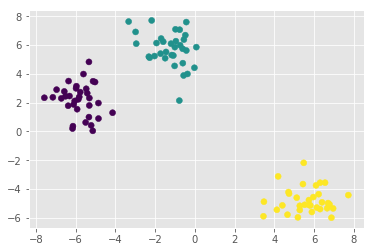

In [5]:
plt.scatter(X[:,0], X[:, 1], c=y)

Проверьте Вашу имплементацию на простых данных (без этого пункта ДЗ не считается выполненным).   
КОММЕНТАРИИ НЕ СТИРАТЬ!

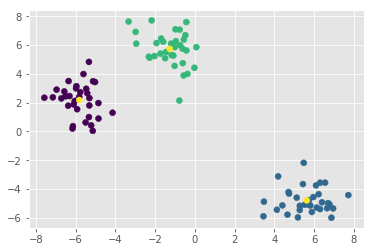

In [6]:
## Работоспособность MyKmeans

my_clf = MyKmeans(k=3, init='random')
my_clf.fit(X)
X_ext = np.concatenate((X, my_clf.centroids))
y_pred = np.concatenate((my_clf.predict(X), 3 * [3]))
plt.scatter(X_ext[:,0], X_ext[:, 1], c=y_pred)
plt.show()

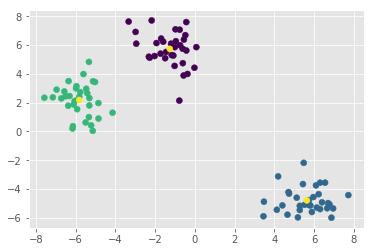

In [7]:
## Работоспособность MyKmeans++

my_clf = MyKmeans(k=3, init='k-means')
my_clf.fit(X)
X_ext = np.concatenate((X, my_clf.centroids))
y_pred = np.concatenate((my_clf.predict(X), 3 * [3]))
plt.scatter(X_ext[:,0], X_ext[:, 1], c=y_pred)
plt.show()

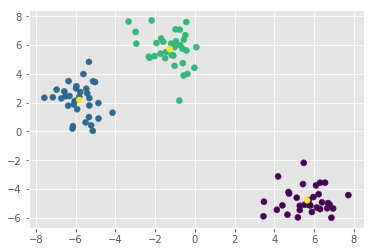

In [8]:
## Работоспособность MyKmeans с MiniBatchMyKmeans

my_clf = MiniBatchMyKmeans(k=3)
my_clf.fit(X)
X_ext = np.concatenate((X, my_clf.centroids))
y_pred = np.concatenate((my_clf.predict(X), 3 * [3]))
plt.scatter(X_ext[:,0], X_ext[:, 1], c=y_pred)
plt.show()

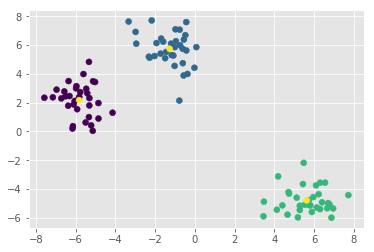

In [9]:
## Работоспособность MyKmeans++ с MiniBatchMyKmeans

my_clf = MiniBatchMyKmeans(k=3, init='k-means')
my_clf.fit(X)
X_ext = np.concatenate((X, my_clf.centroids))
y_pred = np.concatenate((my_clf.predict(X), 3 * [3]))
plt.scatter(X_ext[:,0], X_ext[:, 1], c=y_pred)
plt.show()

In [10]:
## Время выполнения алгоритма Kmeans из sklearn

clf = KMeans(n_clusters=3, max_iter=1000, tol=0)
%time clf.fit(X)

CPU times: user 2.79 s, sys: 0 ns, total: 2.79 s
Wall time: 2.9 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0, verbose=0)

In [11]:
## Время выполнения алгоритма MyKmeans

my_clf = MyKmeans(k=3, init='random')
%time my_clf.fit(X)

CPU times: user 291 ms, sys: 3.53 ms, total: 294 ms
Wall time: 296 ms


In [12]:
## Время выполнения алгоритма MyKmeans++

my_clf = MyKmeans(k=3, init='k-means')
%time my_clf.fit(X)

CPU times: user 332 ms, sys: 3.9 ms, total: 336 ms
Wall time: 338 ms


In [13]:
## Время выполнения алгоритма MyKmeans с MiniBatchMyKmeans

my_clf = MiniBatchMyKmeans(k=3, init='random')
%time my_clf.fit(X)

CPU times: user 275 ms, sys: 0 ns, total: 275 ms
Wall time: 281 ms


In [14]:
## Время выполнения алгоритма  MyKmeans++ с MiniBatchMyKmeans

my_clf = MiniBatchMyKmeans(k=3, init='k-means')
%time my_clf.fit(X)

CPU times: user 282 ms, sys: 0 ns, total: 282 ms
Wall time: 282 ms


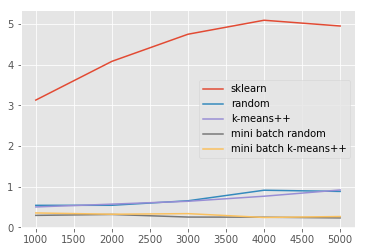

In [15]:
clf = [KMeans(n_clusters=3, max_iter=1000, tol=0),
        MyKmeans(k=3, init='random'),
        MyKmeans(k=3, init='k-means'),
        MiniBatchMyKmeans(k=3, init='random'),
        MiniBatchMyKmeans(k=3, init='k-means')]

clf_label = ['sklearn', 'random', 'k-means++', 
             'mini batch random', 'mini batch k-means++']

time_clf = [[], [], [], [], []]
axis = []

for n_samples in range(1000, 5001, 1000):
    X, _ = make_blobs(n_samples=n_samples, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=4321)
    
    axis.append(n_samples)
    for i in range(len(clf)):
        t = time.time()
        clf[i].fit(X)
        time_clf[i].append(time.time() - t)

for i in range(len(clf)):
    plt.plot(axis, time_clf[i], label=clf_label[i])

plt.legend()
plt.show()

# Применение K-means на реальных данных

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.  (без этого пункта задание не считается выполненным).   
ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [16]:
df_sns = pd.read_csv('snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [17]:
df = df_sns.drop(['gradyear', 'gender', 'age', 'friends'], axis='columns')

In [18]:
keys = df.columns

In [19]:
scaler = preprocessing.StandardScaler()
scaler.fit_transform(df)

/home/george/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/george/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.33221726, -0.35769737, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [-0.33221726,  1.06004883, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [-0.33221726,  1.06004883, -0.2428741 , ...,  2.02790809,
        -0.22040264, -0.1749076 ],
       ...,
       [-0.33221726,  1.06004883, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [-0.33221726, -0.35769737, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [ 2.15319868, -0.35769737, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ]])

In [35]:
## MyKMeans

my_clf = MyKmeans(k=9, init='random')
my_clf.fit(df.values)

In [36]:
def get_info(clf, N=5):
    res = clf.predict(df)

    unique, counts = np.unique(res, return_counts=True)

    N = 5
    for c_id in range(clf.centroids.shape[0]):
        print(f'{c_id + 1} centroid')
        print(f'{counts[c_id]} students')
        indices = np.argpartition(-clf.centroids[c_id], N)[:N]
        print(f'top {N} themes')
        print(list(keys[indices]))
        print()

In [37]:
get_info(my_clf)

1 centroid
532 students
top 5 themes
['jesus', 'music', 'god', 'church', 'hair']

2 centroid
543 students
top 5 themes
['marching', 'band', 'music', 'god', 'dance']

3 centroid
1337 students
top 5 themes
['church', 'god', 'mall', 'shopping', 'music']

4 centroid
14409 students
top 5 themes
['hair', 'cute', 'shopping', 'god', 'basketball']

5 centroid
1100 students
top 5 themes
['hair', 'music', 'shopping', 'dance', 'cute']

6 centroid
9634 students
top 5 themes
['music', 'shopping', 'god', 'hair', 'cute']

7 centroid
1063 students
top 5 themes
['sex', 'music', 'kissed', 'hair', 'blonde']

8 centroid
717 students
top 5 themes
['shopping', 'hair', 'soccer', 'basketball', 'music']

9 centroid
665 students
top 5 themes
['music', 'rock', 'hair', 'god', 'band']



Тематика постов первого кластера связана с религией. Второй кластер объединяет любителей религиозной музыки. Темы пятого и седьмого будто сошли со страниц журнала для девушек-подростков. Девятый — рок-музыке.

In [38]:
## MyKMeans++

my_clf = MyKmeans(k=9, init='k-means')
my_clf.fit(df.values)

In [39]:
get_info(my_clf)

1 centroid
2827 students
top 5 themes
['hair', 'basketball', 'dress', 'jesus', 'bible']

2 centroid
8170 students
top 5 themes
['bible', 'church', 'hair', 'music', 'blonde']

3 centroid
2405 students
top 5 themes
['hair', 'sex', 'dress', 'music', 'blonde']

4 centroid
3122 students
top 5 themes
['bible', 'dance', 'hair', 'blonde', 'jesus']

5 centroid
856 students
top 5 themes
['hair', 'jesus', 'soccer', 'dress', 'mall']

6 centroid
2590 students
top 5 themes
['hair', 'jesus', 'dress', 'shopping', 'mall']

7 centroid
754 students
top 5 themes
['hair', 'bible', 'dress', 'cheerleading', 'mall']

8 centroid
8783 students
top 5 themes
['hair', 'jesus', 'dress', 'mall', 'bible']

9 centroid
493 students
top 5 themes
['hair', 'jesus', 'dress', 'softball', 'mall']



Третий кластер снова возвращает нас к тематикам интересов классической девочки-подростка.

In [40]:
## MyKMeans с MiniBatchMyKMeans

my_clf = MiniBatchMyKmeans(k=9, init='random')
my_clf.fit(df.values)

In [41]:
get_info(my_clf)

1 centroid
1507 students
top 5 themes
['soccer', 'basketball', 'football', 'music', 'shopping']

2 centroid
1737 students
top 5 themes
['band', 'hair', 'music', 'dance', 'football']

3 centroid
1200 students
top 5 themes
['music', 'sex', 'hair', 'kissed', 'die']

4 centroid
842 students
top 5 themes
['cheerleading', 'dance', 'music', 'softball', 'basketball']

5 centroid
20086 students
top 5 themes
['god', 'cute', 'shopping', 'music', 'hair']

6 centroid
874 students
top 5 themes
['music', 'death', 'jesus', 'church', 'god']

7 centroid
1444 students
top 5 themes
['music', 'shopping', 'church', 'cute', 'volleyball']

8 centroid
920 students
top 5 themes
['music', 'rock', 'band', 'mall', 'shopping']

9 centroid
1390 students
top 5 themes
['shopping', 'church', 'music', 'dance', 'cute']



Первый и чётвёртый кластеры объединяет людей, интересующихся спортом. Третий снова возвращает нас к тематикам интересов классической девочки-подростка. В шестом — интересующиеся религиозной музыкой люди.

In [46]:
## MyKMeans++ с MiniBatchMyKMeans

my_clf = MiniBatchMyKmeans(k=9, init='k-means')
my_clf.fit(df.values)

In [47]:
get_info(my_clf)

1 centroid
2048 students
top 5 themes
['hair', 'jesus', 'soccer', 'dress', 'mall']

2 centroid
8487 students
top 5 themes
['bible', 'church', 'hair', 'music', 'blonde']

3 centroid
1895 students
top 5 themes
['bible', 'church', 'band', 'hair', 'blonde']

4 centroid
1255 students
top 5 themes
['hair', 'jesus', 'dress', 'mall', 'bible']

5 centroid
1989 students
top 5 themes
['hair', 'basketball', 'dress', 'jesus', 'bible']

6 centroid
8703 students
top 5 themes
['hair', 'jesus', 'dress', 'mall', 'bible']

7 centroid
3116 students
top 5 themes
['hair', 'jesus', 'dress', 'god', 'mall']

8 centroid
1007 students
top 5 themes
['hair', 'jesus', 'dress', 'mall', 'bible']

9 centroid
1500 students
top 5 themes
['hair', 'cute', 'dress', 'jesus', 'bible']



Результат работы этого классификатора вовсе плохо подвергается интерпретации.

## Вывод

Сложно сравнивать эти алгоритмы в чём-то, кроме времени работы (где, естественно, выигрывает MiniBatch-реализация). Так как кластеризация плохо поддаётся оценке качества на реальных данных, а метод K-Means сильно зависит от удачного выбора начального приближения, сложно делать вывод о том, что результаты работы какой-либо реализации стабильно более качественны, чем ответы её аналогов.